# Setup

## 데이터 불러오기

In [534]:
import boto3
import pandas as pd
import botocore
from sagemaker import get_execution_role
import warnings
warnings.filterwarnings('ignore')

role = get_execution_role()

# s3 버킷 접근
bucket = '# 본인 버킷 입력'
s3_client = boto3.client('s3')
subfolder = 'data/'

In [535]:
# 학습 데이터 로드
train_key = 'data/train.csv'
response1 = s3_client.get_object(Bucket = bucket, Key = train_key)
train = pd.read_csv(response1['Body'])
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [536]:
# 검증 데이터 로드
val_key = 'data/val.csv'
response2 = s3_client.get_object(Bucket = bucket, Key = val_key)
val = pd.read_csv(response2['Body'])
val.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [537]:
# 테스트 데이터 로드
test_key = 'data/test.csv'
response3 = s3_client.get_object(Bucket = bucket, Key = test_key)
test = pd.read_csv(response3['Body'])
test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


## 데이터 변형

## Train 변형

In [538]:
train_df = train.drop('ID', axis = 1)
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [539]:
train_df.shape

(113842, 30)

In [540]:
# taxi_data와 유사, 한 열씩 연속적으로 들어가는 것 확인 가능!
# train_df.values.reshape(-1,1)
train_df.values

array([[ -1.35835406,  -1.34016307,   1.77320934, ...,  -0.05975184,
          4.98372109,  -0.99497175],
       [ -0.96627171,  -0.18522601,   1.79299334, ...,   0.06145763,
          1.41829106,  -0.99497175],
       [ -0.42596588,   0.96052304,   1.14110934, ...,   0.08108026,
         -0.25613079,  -0.99496   ],
       ...,
       [ -0.24192292,   0.71224653,   0.39980566, ...,   0.08126506,
         -0.23069936,   1.03490408],
       [  0.12031638,   0.93100513,  -0.54601214, ...,   0.06880333,
         -0.26982463,   1.03493932],
       [-11.88111789,  10.07178497,  -9.83478346, ...,   0.82373096,
         -0.29665339,   1.03495107]])

In [541]:
train_values = train_df.values

## Val 변형

In [542]:
val_df_x = val.drop(['ID','Class'],axis = 1)
val_df_y = val[['Class']]

val_df_y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [543]:
val_df_x.shape

(28462, 30)

In [545]:
val_df_x.values

array([[-0.33826175,  1.11959338,  1.04436655, ...,  0.08307565,
        -0.25599106, -0.99487776],
       [ 0.96249607,  0.32846103, -0.17147905, ..., -0.01460533,
         0.16893733, -0.99478377],
       [ 1.14552439,  0.57506797,  0.19400846, ...,  0.0162515 ,
         0.16949626, -0.99450182],
       ...,
       [-0.4469509 ,  1.30221237, -0.16858299, ...,  0.22992129,
         0.53797247,  1.0347631 ],
       [ 2.03955977, -0.1752331 , -1.19682531, ..., -0.07507052,
        -0.26996437,  1.03492757],
       [-0.24044005,  0.53048251,  0.70251023, ...,  0.10453282,
        -0.16767973,  1.03497457]])

In [544]:
val_values = val_df_x.values

## Test 변형

In [546]:
test_df = test.drop(['ID'],axis = 1)
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [547]:
test_df.shape

(142503, 30)

In [548]:
test_values = test_df.values

In [549]:
test_values.shape

(142503, 30)

# Model

In [624]:
# model은 train set 이용해서 생성
# 사기비율 0.0039로 설정
# 트리 생성 개수 - 200
from sagemaker import RandomCutForest

session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(
    role=role,
    instance_count=1,
    instance_type="ml.m4.xlarge",
    data_location=f"s3://{bucket}/{prefix}/",
    output_path=f"s3://{bucket}/{prefix}/output",
    num_samples_per_tree=512,
    num_trees=500, 
)

# automatically upload the training data to S3 and run the training job
rcf.fit(rcf.record_set(train_values))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-08-04 17:06:27 Starting - Starting the training job...
2022-08-04 17:06:53 Starting - Preparing the instances for trainingProfilerReport-1659632787: InProgress
.........
2022-08-04 17:08:25 Downloading - Downloading input data
2022-08-04 17:08:25 Training - Downloading the training image.........
2022-08-04 17:09:56 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/04/2022 17:10:05 INFO 139710443001664] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', '_ftp_port': 8999}
[08/04/2022 17:10:05 INFO 139710443001664

In [625]:
# 알고리즘 이름 설명
# https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-train-model.html
print(f"Training job name: {rcf.latest_training_job.job_name}")

Training job name: randomcutforest-2022-08-04-17-06-27-718


# Inference

In [626]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/deploy-model.html
# 또 다른 클러스터..?
rcf_inference = rcf.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


--------!

In [627]:
print(f"Endpoint name: {rcf_inference.endpoint}")

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Endpoint name: randomcutforest-2022-08-04-17-11-41-061


# Data Serialization/Deserialization

In [628]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

rcf_inference.serializer = CSVSerializer()
rcf_inference.deserializer = JSONDeserializer()

In [629]:
# val로 predict 해서 검증
val_data_numpy = val_values
print(val_data_numpy[:][:2])  # [관계없이 다 나옴][2개씩 짤려서 나옴]
results = rcf_inference.predict(
    val_data_numpy[:][:2], initial_args={"ContentType": "text/csv", "Accept": "application/json"}
)

[[-0.33826175  1.11959338  1.04436655 -0.22218728  0.49936081 -0.2467611
   0.65158321  0.06953859 -0.73672732 -0.36684564  1.01761447  0.83638957
   1.00684351 -0.44352282  0.1502191   0.73945278 -0.54097992  0.47667726
   0.45177296  0.20371145 -0.24691394 -0.63375264 -0.12079408 -0.38504993
  -0.06973305  0.09419883  0.2462193   0.08307565 -0.25599106 -0.99487776]
 [ 0.96249607  0.32846103 -0.17147905  2.10920407  1.12956557  1.69603769
   0.10771161  0.52150216 -1.1913111   0.72439631  1.69032992  0.40677358
  -0.9364213   0.98373942  0.71091077 -0.60223177  0.40248438 -1.73716203
  -2.02761232 -0.26932097  0.14399742  0.40249166 -0.04850822 -1.37186629
   0.39081389  0.19996366  0.01637064 -0.01460533  0.16893733 -0.99478377]]


In [630]:
# 하나의 행에 대한 값만 나옴!!!!!!야호
print(results)

{'scores': [{'score': 0.6442142596}, {'score': 0.8333741852}]}


In [631]:
val_df_x.shape

(28462, 30)

In [632]:
val_data_numpy.shape

(28462, 30)

In [633]:
val_data_numpy[:][:2]

array([[-0.33826175,  1.11959338,  1.04436655, -0.22218728,  0.49936081,
        -0.2467611 ,  0.65158321,  0.06953859, -0.73672732, -0.36684564,
         1.01761447,  0.83638957,  1.00684351, -0.44352282,  0.1502191 ,
         0.73945278, -0.54097992,  0.47667726,  0.45177296,  0.20371145,
        -0.24691394, -0.63375264, -0.12079408, -0.38504993, -0.06973305,
         0.09419883,  0.2462193 ,  0.08307565, -0.25599106, -0.99487776],
       [ 0.96249607,  0.32846103, -0.17147905,  2.10920407,  1.12956557,
         1.69603769,  0.10771161,  0.52150216, -1.1913111 ,  0.72439631,
         1.69032992,  0.40677358, -0.9364213 ,  0.98373942,  0.71091077,
        -0.60223177,  0.40248438, -1.73716203, -2.02761232, -0.26932097,
         0.14399742,  0.40249166, -0.04850822, -1.37186629,  0.39081389,
         0.19996366,  0.01637064, -0.01460533,  0.16893733, -0.99478377]])

# Computing Anomaly Scores

## val 이용한 예측

In [634]:
# 10000까지 predict 값을 내보냄!!!!!
result1 = rcf_inference.predict(val_data_numpy[:][:10000])
scores = [datum["score"] for datum in result1["scores"]]

# 새로운 데이터 프레임 생성
# add scores to taxi data frame and print first few valaues
val_score = pd.DataFrame({'score':scores}, index = [i+1 for i in range(10000)])
val_score.head()

,score
1,0.644214
2,0.833374
3,0.698683
4,0.795408
5,1.462188


In [635]:
# 300000 데이터 이상 부터 다시 predict
result2 = rcf_inference.predict(val_data_numpy[:][10000 : 20000])
scores2 = [datum["score"] for datum in result2["scores"]]

# 새로운 데이터 프레임 생성
# add scores to taxi data frame and print first few valaues
val_score2 = pd.DataFrame({'score':scores2}, index = [i+1 for i in range(10000, 20000)])
val_score2.head()

,score
10001,0.837388
10002,0.644987
10003,0.852697
10004,0.602986
10005,0.651036


In [636]:
# 60만 이상부터 predict
result3 = rcf_inference.predict(val_data_numpy[:][20000 :])
scores3 = [datum["score"] for datum in result3["scores"]]

# 새로운 데이터 프레임 생성
# add scores to taxi data frame and print first few valaues
val_score3 = pd.DataFrame({'score':scores3}, index = [i+1 for i in range(20000,28462)])
val_score3.head()

,score
20001,0.652809
20002,0.688124
20003,0.822500
20004,0.624095
20005,0.792707


## val 전체 DataFrame 생성

In [637]:
val_pred_all = pd.concat([val_score, val_score2, val_score3], axis = 0)
print(val_pred_all.shape)
print(val_pred_all.head())

(28462, 1)
      score
1  0.644214
2  0.833374
3  0.698683
4  0.795408
5  1.462188


In [638]:
val_pred_all.describe()

,score
count,28462.000000
mean,0.785967
std,0.276317
min,0.519178
25%,0.647231
50%,0.719688
75%,0.838369
max,5.637445


In [639]:
val_pred_all[val_pred_all['score'] >= 1].count()/28462

score    0.092826
dtype: float64

## 점수 표준화 하기!

### 점수 매긴 값 표준화

In [640]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
val_pred_scaler = scaler.fit_transform(val_pred_all)
print(val_pred_scaler)

[[0.02442935]
 [0.06138717]
 [0.03507133]
 ...
 [0.04361399]
 [0.02638229]
 [0.06711809]]


In [641]:
val_pred_scaler.shape

(28462, 1)

In [642]:
val_pred_scaler = pd.DataFrame(data = val_pred_scaler, columns = ['score'])
val_pred_scaler.head()

,score
0,0.024429
1,0.061387
2,0.035071
3,0.053969
4,0.184244


## 그래프 그려보기!

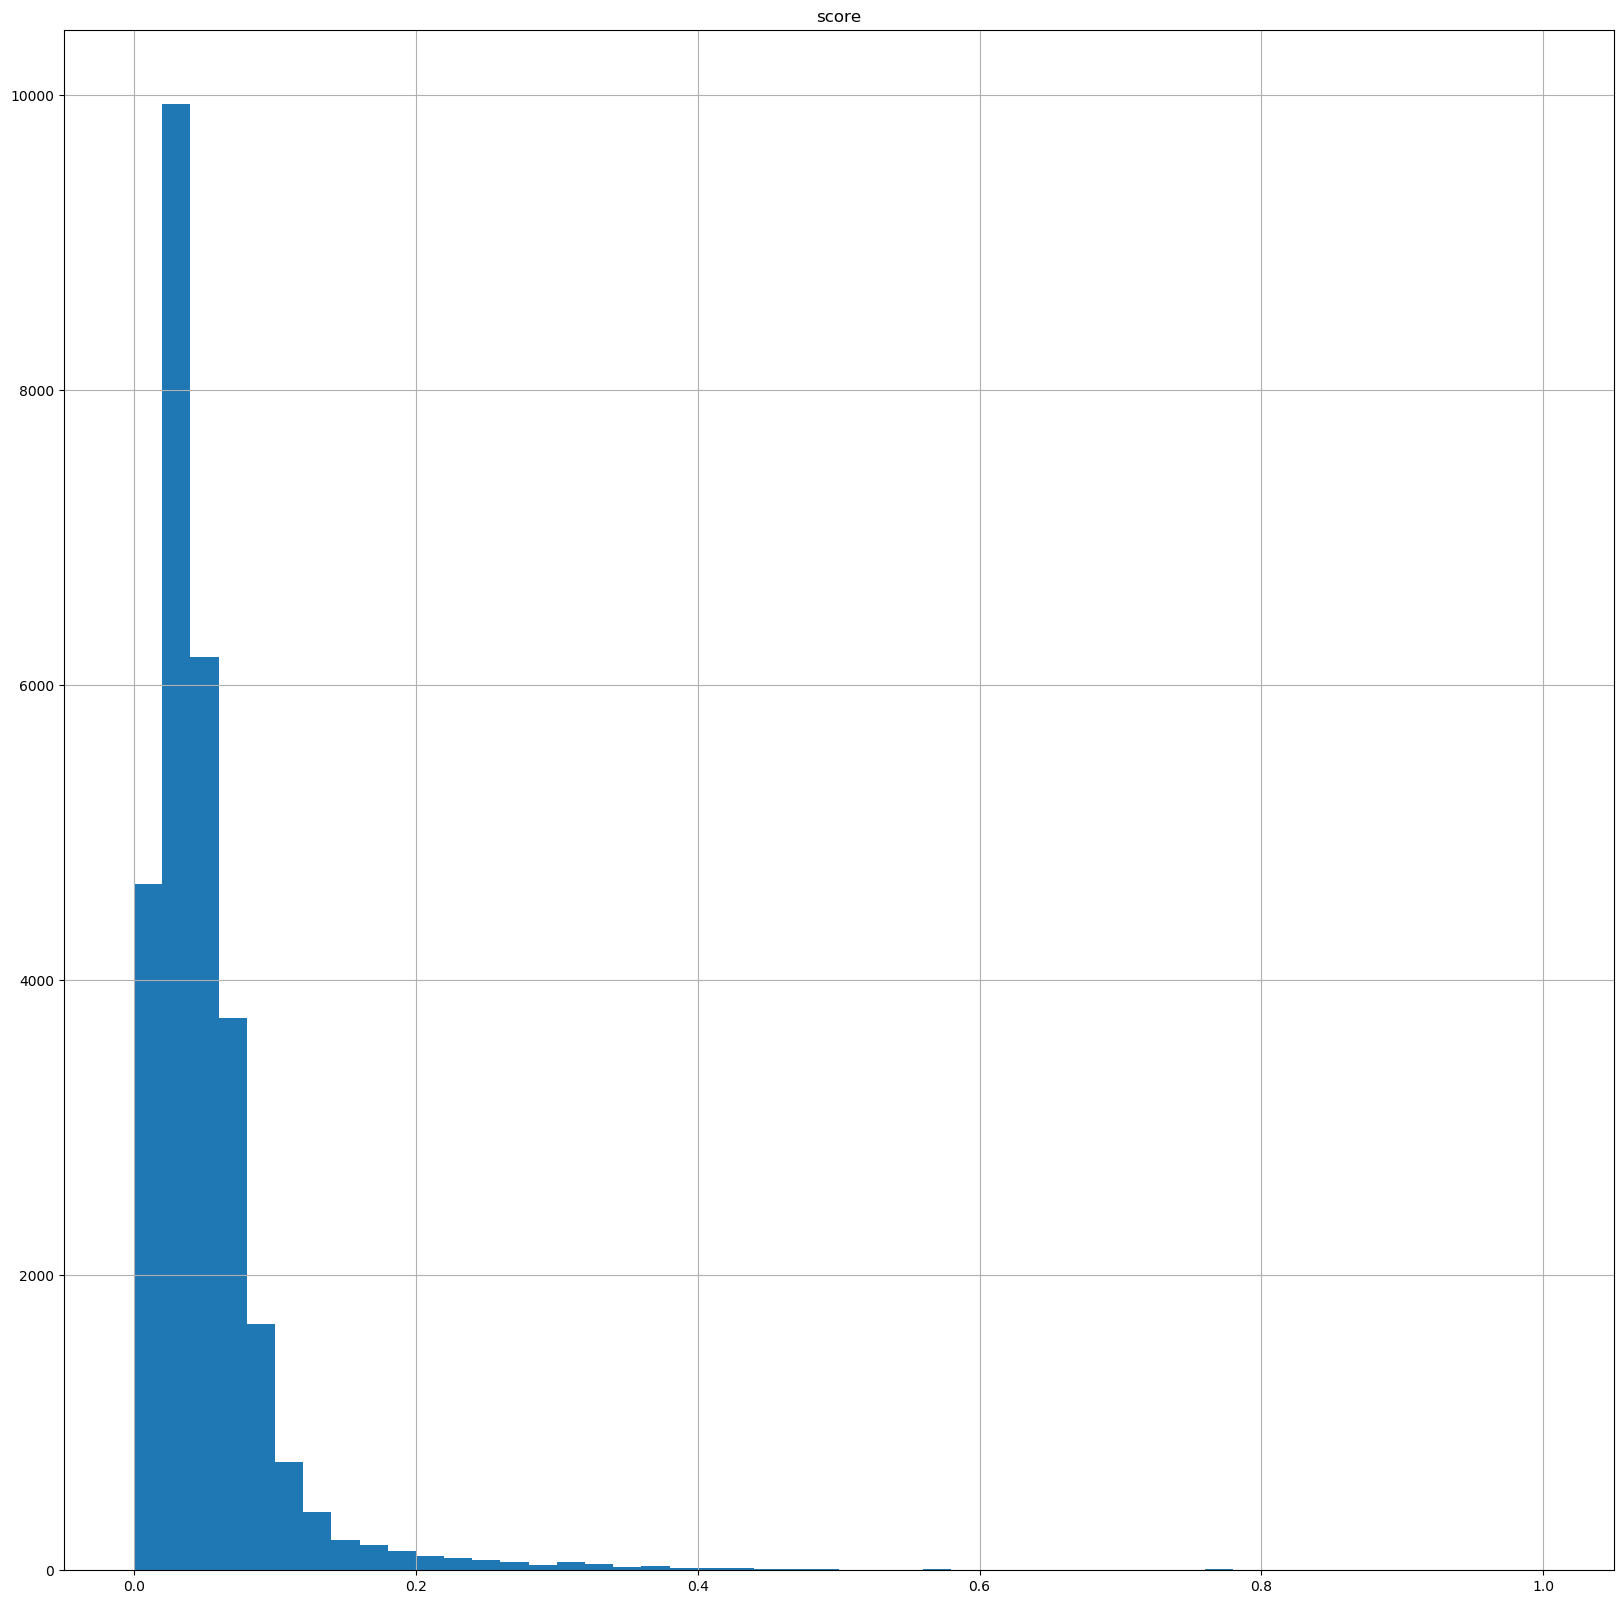

In [643]:
val_pred_scaler.hist(bins = 50, figsize = (20,20))
plt.show()

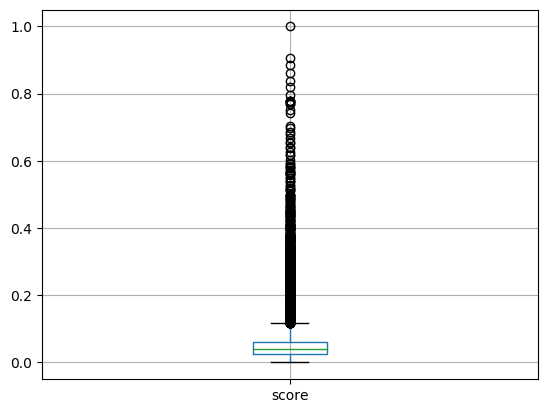

In [644]:
val_pred_scaler.boxplot()
plt.show()

In [645]:
val_pred_scaler.describe()

,score
count,28462.000000
mean,0.052125
std,0.053986
min,0.000000
25%,0.025019
50%,0.039175
75%,0.062363
max,1.000000


In [672]:
# 선택!!!!!!!!
val_pred_scaler[val_pred_scaler['score'] > 0.7].count()/28462

score    0.000597
class    0.000597
dtype: float64

In [673]:
val_pred_scaler[val_pred_scaler['score'] > 0.7].count()

score    17
class    17
dtype: int64

In [674]:
val_df_y['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

## 구간 나눈 후 임계값 설정하기

## 0.5를 기준으로

In [675]:
# 0~8까지 구간으로 나누기
# result 만들기
def result(score):
    if score < 0.7:
        answer = 0
    else:
        answer = 1
    return answer
        
val_pred_scaler['class'] = val_pred_scaler['score'].apply(lambda x: result(x)) 
val_pred_scaler.head(30)

,score,class
0,0.024429,0
1,0.061387,0
2,0.035071,0
3,0.053969,0
4,0.184244,0
5,0.024285,0
6,0.026972,0
7,0.049975,0
8,0.014408,0
9,0.036371,0


In [670]:
val_pred_scaler['class'].value_counts()

0    28447
1       15
Name: class, dtype: int64

### 평가하기

In [671]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

val_score = f1_score(val_df_y, val_pred_scaler['class'], average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_df_y, val_pred_scaler['class']))

Validation F1 Score : [0.7220024574584254]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.67      0.33      0.44        30

    accuracy                           1.00     28462
   macro avg       0.83      0.67      0.72     28462
weighted avg       1.00      1.00      1.00     28462



### 0.45를 기준으로 - 당첨!

# Test 적용하기

In [516]:
test_values.shape

(142503, 30)

In [517]:
# 30만까지 predict 값을 내보냄!!!!!
# 15번 반복 
def predict(start,end):
    result = rcf_inference.predict(test_values[:][start:end])
    scores = [datum["score"] for datum in result["scores"]]

    # 새로운 데이터 프레임 생성
    # add scores to taxi data frame and print first few valaues
    val_score = pd.DataFrame({'score':scores}, index = [i+1 for i in range(start,end)])
    return val_score

In [518]:
# 전체 df 생성
start_end = [[0,10000],[10000,20000],[20000,30000],[30000,40000],[40000,50000], [50000, 60000],
            [60000, 70000],[70000,80000],[80000,90000],[90000,100000],[100000,110000],[110000,120000],[120000,130000],[130000,140000],[140000,142503]]

new_val = pd.concat([predict(nums[0],nums[1]) for nums in start_end], axis = 0) # start_end에 있는 값 넘겨주기

print(new_val.shape)

(142503, 1)


In [519]:
new_test = new_val

In [520]:
# 표준화 하기
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_test_scaler = scaler.fit_transform(new_test)
print(new_test_scaler)

[[0.02632544]
 [0.00959019]
 [0.01968982]
 ...
 [0.03910488]
 [0.0411632 ]
 [0.02275551]]


In [521]:
new_test_scaler = pd.DataFrame(data = new_test_scaler, columns = ['score'])
new_test_scaler.head()

,score
0,0.026325
1,0.009590
2,0.019690
3,0.015033
4,0.031426


In [522]:
new_test_scaler.shape

(142503, 1)

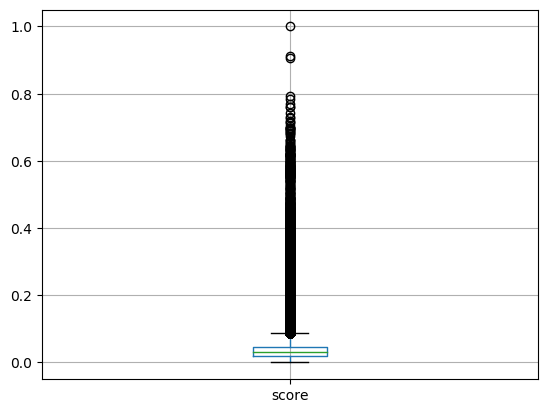

In [523]:
new_test_scaler.boxplot()
plt.show()

In [526]:
# best 값 찾기
new_test_scaler[new_test_scaler['score'] > 0.45].count()/142503

score    0.001684
dtype: float64

In [527]:
# 0~8까지 구간으로 나누기
# result 만들기
def result(score):
    if score < 0.45:
        answer = 0
    else:
        answer = 1
    return answer
        
new_test_scaler['result'] = new_test_scaler['score'].apply(lambda x: result(x)) 
new_test_scaler.head(30)

,score,result
0,0.026325,0
1,0.009590,0
2,0.019690,0
3,0.015033,0
4,0.031426,0
5,0.031108,0
6,0.013264,0
7,0.036318,0
8,0.029158,0
9,0.043743,0


## 수정하기!!!

In [528]:
new_test_scaler['result'].value_counts()

0    142263
1       240
Name: result, dtype: int64

# submission 정리

In [529]:
# submission 데이터 로드
submit_key = 'data/sample_submission.csv'
response4 = s3_client.get_object(Bucket = bucket, Key = submit_key)
submit = pd.read_csv(response4['Body'])
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [530]:
submit['Class'] = new_test_scaler['result']

submit.head()

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0


In [531]:
submit['Class'].value_counts()

0    142263
1       240
Name: Class, dtype: int64

In [532]:
import s3fs

s3 = s3fs.S3FileSystem(anon=False)

# Use 'w' for py3, 'wb' for py2
with s3.open('sagemaker-studio-fu85vbeabbq/submission_rcf_3.csv','w') as f:
    submit.to_csv(f,index = False)

In [533]:
sagemaker.Session().delete_endpoint(rcf_inference.endpoint)

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
